In [2]:
#Importing Library
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
tf.random.set_seed(3)
import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
#Loading the data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
#shape of numpy array
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of x_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


Training Data = 60000 Img of 28*28

Test Data = 10000 Img of 28*28

grayscale Img

In [5]:
#printing the 10th img

print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(x_train[10].shape)

(28, 28)


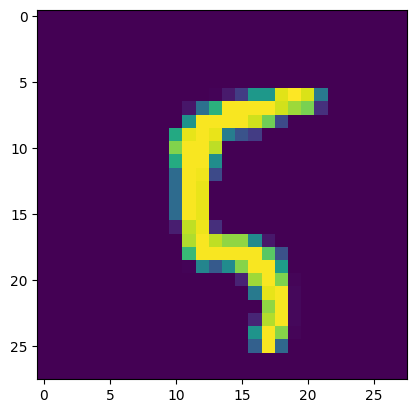

5


In [7]:
#Displaying the img
plt.imshow(x_train[100])
plt.show()


#Displaying the output of image
print(y_train[100])

In [8]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [9]:
# unique value in y_train 
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply **One Hot Encoding**

In [10]:
#scaling the values
x_train = x_train/255
x_test = x_test/255

# Building the Neural Network

In [11]:
#setting up the layers of the Nerual Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#compiling the Neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
#Train the model
model.fit(x_train,y_train ,epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8547 - loss: 0.5090
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step - accuracy: 0.9554 - loss: 0.1504
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - accuracy: 0.9673 - loss: 0.1079
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.9739 - loss: 0.0851
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.9791 - loss: 0.0695
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.9829 - loss: 0.0580
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 916us/step - accuracy: 0.9860 - loss: 0.0490
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accuracy: 0.9879 - loss: 0.0412
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - accuracy: 0.9884 - loss: 0.0379
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - accuracy: 0.9899 - loss: 0.0324
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 919us/step - accuracy: 0.9911 - loss: 0.0295
Epoch 12/5

Accuracy of Train Data: 99.95%

In [14]:
loss , accuracy = model.evaluate(x_test,y_test)
print('Accuracy of Test Data: ',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.9677 - loss: 0.2930
Accuracy of Test Data:  0.9710000157356262


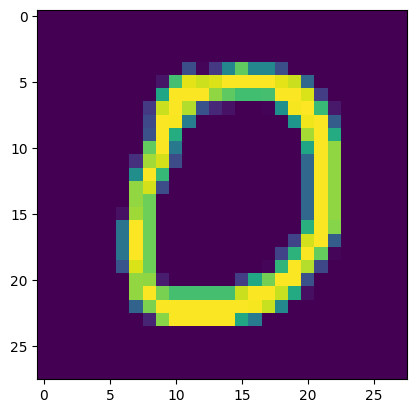

In [15]:
plt.imshow(x_test[10])
plt.show()

In [16]:
print(y_test[10])


0


In [17]:
#Prediction is made for x_test data
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step


model.predict() gives the prediction probability of each class for the data point

In [18]:
print(y_pred[10])

[1.0000000e+00 3.6609160e-13 2.1491256e-01 1.3373483e-09 2.0535254e-24
 7.0928439e-04 1.3339473e-05 9.1723180e-08 9.2736258e-08 1.2654145e-06]


In [19]:
label_for_predict = np.argmax(y_pred[10])
print(label_for_predict)

0


In [20]:
#Coverting the prediction probabilities to class label for all test data points
y_pred_label = [np.argmax(i) for i in y_pred]
print(y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 4, 5, 7, 8, 9, 3, 3, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 0, 1, 1, 1, 3, 8, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 2, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 8, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

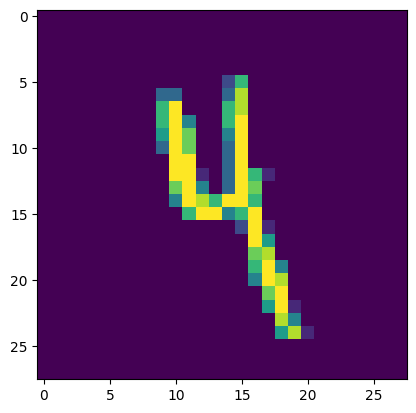

4


In [21]:
i =959
plt.imshow(x_test[i])
plt.show()
print(y_pred_label[i])

# Confusion Matrix

In [22]:
conf = confusion_matrix(y_test , y_pred_label)

In [23]:
print(conf)

tf.Tensor(
[[ 967    0    3    2    3    2    0    1    1    1]
 [   0 1125    2    3    0    1    2    0    2    0]
 [   2   32  978    9    1    0    2    4    4    0]
 [   0    1   12  977    1    3    0    6    2    8]
 [   0    1    8    1  959    1    2    1    2    7]
 [   2    0    1   41    2  827    5    2    5    7]
 [  40    2    1    0    9   11  892    1    2    0]
 [   0   18   28    8    6    0    1  954    1   12]
 [   8    0    9   12    5    6    4    4  920    6]
 [   2    2    0   10   37    3    0    7    5  943]], shape=(10, 10), dtype=int32)


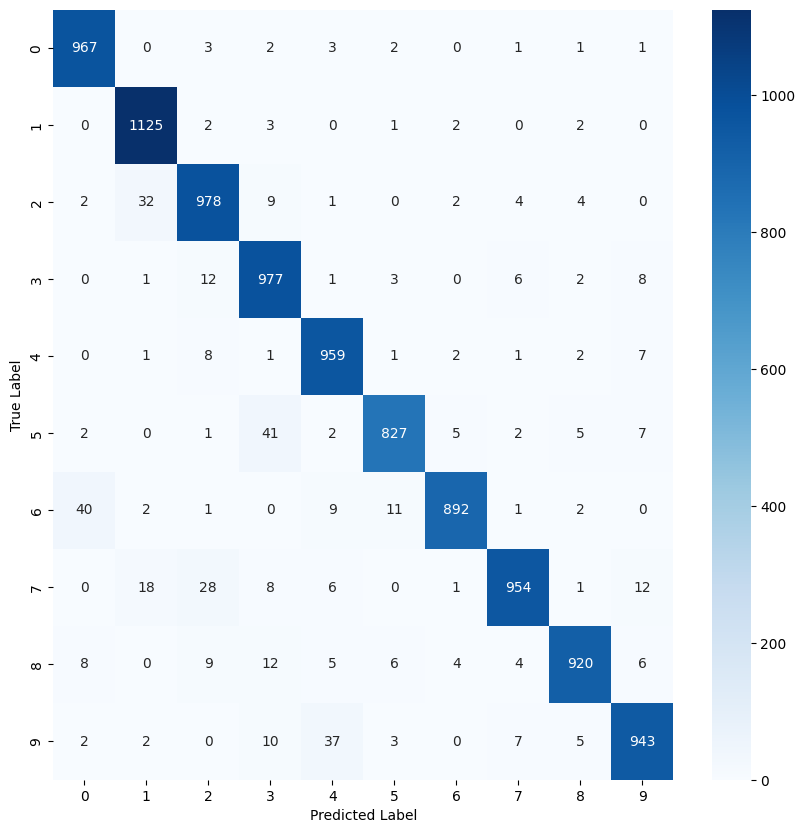

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(conf,annot = True , fmt = 'd',cmap ='Blues' )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Build the Predictive System

In [25]:
input_image ="D:\Visual Studio Code\ML\Youtube_ML_Code\Check DIgit Recognizing\Example-of-a-MNIST-input-An-image-is-passed-to-the-network-as-a-matrix-of-28-by-28.png"
img = cv2.imread(input_image)


<>:1: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\V'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3964\3030518869.py:1: SyntaxWarning: invalid escape sequence '\V'
  input_image ="D:\Visual Studio Code\ML\Youtube_ML_Code\Check DIgit Recognizing\Example-of-a-MNIST-input-An-image-is-passed-to-the-network-as-a-matrix-of-28-by-28.png"


In [26]:
type(img)
print(img.shape)

(176, 176, 3)


In [27]:
cv2.imshow('digit img',img)

# Wait for a key press and close the image window
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
img.shape

(176, 176, 3)

In [29]:
grayscale = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [30]:
grayscale.shape

(176, 176)

In [31]:
img = cv2.resize(grayscale,(28,28))

In [32]:
img.shape

(28, 28)

In [33]:
type(img)

numpy.ndarray

In [34]:
cv2.imshow('digit img',img)

# Wait for a key press and close the image window
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
# Resizing the image
img = img/255

In [36]:
img_reshaped = np.reshape(img,[1,28,28])

In [37]:
input_pred = model.predict(img_reshaped)
print(input_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.0000000e+00 1.5221813e-20 2.4835928e-11 1.0000000e+00 3.1906815e-19
  1.6179874e-06 0.0000000e+00 9.9999762e-01 4.5475045e-07 7.4912170e-03]]


In [38]:
input_pred_label = np.argmax(input_pred)

In [39]:
print(input_pred_label)

3


Predicted System

In [42]:
input_image =input('Enter path of the Image: ')
img = cv2.imread(input_image)

#showing the Image
cv2.imshow('digit img',img)

# Wait for a key press and close the image window
cv2.waitKey(0)
cv2.destroyAllWindows()

#Gray scaling the image
grayscale = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

#Reshaping the image
img = cv2.resize(grayscale,(28,28))

# Resizing the image
img = img/255

#Again re shaping the image
img_reshaped = np.reshape(img,[1,28,28])

#MAKING Prediction
input_pred = model.predict(img_reshaped)

#Finding the max value 
input_pred_label = np.argmax(input_pred)

#printing the label 
print("Predicted label: ",input_pred_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted label:  3
